In [245]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.set_option("display.max_column", 100)

In [186]:
df = pd.read_csv("customer_churn.csv")

In [187]:
df.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [188]:
df.drop(columns="customerID", inplace=True, axis=1)

In [189]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [190]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [191]:
df.describe(include='all')

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,2,NaN,2,2,NaN,2,3,3,3,3,3,3,3,3,3,2,4,NaN,6531,2
top,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,,No
freq,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


In [192]:
df.sample(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1678,Female,1,Yes,No,67,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,No,Yes,One year,Yes,Credit card (automatic),105.40,7035.6,No
6193,Female,0,No,Yes,13,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),104.15,1299.1,No
5284,Female,1,No,No,5,No,No phone service,DSL,No,No,No,No,Yes,Yes,Month-to-month,No,Electronic check,45.70,198,Yes


In [193]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [194]:
# Here you can see the Monthly charges is "float" but the Total Charges is "Object" #Letstacklethis

In [195]:
df["MonthlyCharges"].values

array([ 29.85,  56.95,  53.85, ...,  29.6 ,  74.4 , 105.65])

In [196]:
df["TotalCharges"].values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [197]:
#Here we can see the total charges values are in string we need to convert those to float.

In [198]:
#df["TotalCharges"] = pd.to_numeric(df["TotalCharges"])

In [199]:
# The error says in some position only blank spaces are ther we need to find all the columns which having blank spaces

In [200]:
pd.to_numeric(df["TotalCharges"], errors="coerce") #Here if we give errors= coerce it will ignores the all types of errors and only convert which are convertable

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [201]:
pd.to_numeric(df["TotalCharges"], errors="coerce").isnull().sum()

11

In [202]:
df[pd.to_numeric(df["TotalCharges"], errors="coerce").isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [203]:
df.iloc[488]

gender                                 Female
SeniorCitizen                               0
Partner                                   Yes
Dependents                                Yes
tenure                                      0
PhoneService                               No
MultipleLines                No phone service
InternetService                           DSL
OnlineSecurity                            Yes
OnlineBackup                               No
DeviceProtection                          Yes
TechSupport                               Yes
StreamingTV                               Yes
StreamingMovies                            No
Contract                             Two year
PaperlessBilling                          Yes
PaymentMethod       Bank transfer (automatic)
MonthlyCharges                          52.55
TotalCharges                                 
Churn                                      No
Name: 488, dtype: object

In [204]:
df.iloc[488]["Churn"]

'No'

In [205]:
# Here we will remove all 11 Null values columns

In [206]:
df.shape

(7043, 20)

In [207]:
df = df[df["TotalCharges"] != " "]

In [208]:
df.shape

(7032, 20)

In [209]:
# Here we can see all 11 columns hasbeen removed.

In [210]:
# Now we can convert the data type of Total Charges to float

In [211]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [212]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"])

In [213]:
df["TotalCharges"].dtypes

dtype('float64')

In [214]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [215]:
df["Churn"].unique()

array(['No', 'Yes'], dtype=object)

In [216]:
Customer_churn_no = df[df["Churn"] == "No"].tenure

In [217]:
Customer_churn_no

0        1
1       34
3       45
6       22
7       10
        ..
7037    72
7038    24
7039    72
7040    11
7042    66
Name: tenure, Length: 5163, dtype: int64

In [218]:
Customer_churn_yes = df[df["Churn"]=="Yes"].tenure

In [219]:
Customer_churn_yes

2        2
4        2
5        8
8       28
13      49
        ..
7021    12
7026     9
7032     1
7034    67
7041     4
Name: tenure, Length: 1869, dtype: int64

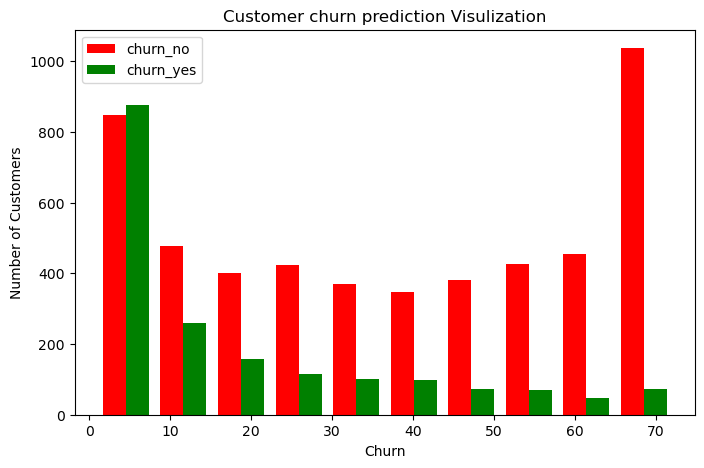

In [220]:
plt.figure(figsize=(8,5))
plt.xlabel("Churn")
plt.ylabel("Number of Customers")
plt.title("Customer churn prediction Visulization")
plt.hist([Customer_churn_no, Customer_churn_yes], color=['red','Green'], label=["churn_no", "churn_yes"])
plt.legend()

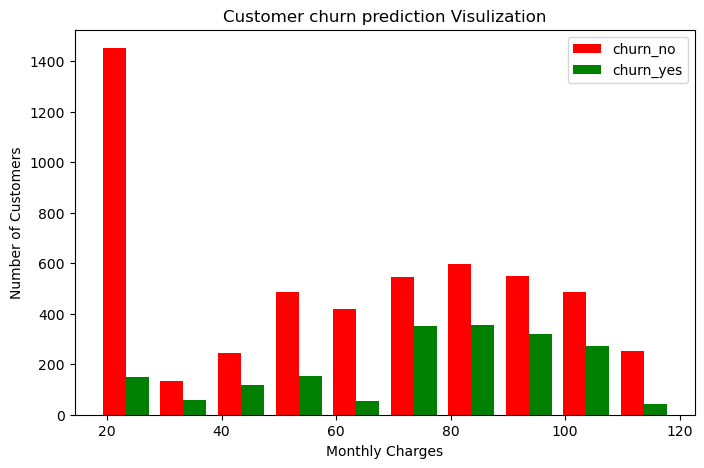

In [221]:
Customer_churn_with_price_no = df[df["Churn"] == "No"].MonthlyCharges
Customer_churn_with_price_Yes = df[df["Churn"] == "Yes"].MonthlyCharges

plt.figure(figsize=(8,5))
plt.xlabel("Monthly Charges")
plt.ylabel("Number of Customers")
plt.title("Customer churn prediction Visulization")
plt.hist([Customer_churn_with_price_no, Customer_churn_with_price_Yes], color=['red','Green'], label=["churn_no", "churn_yes"])
plt.legend()

In [222]:
# Here we will see unique values for each columns

In [223]:
for col in df:
    print(f"{col} : {df[col].unique()} \n")
    print("++++++++++++++++++++++++++++++++++++++++++++++++++++++++++\n")

gender : ['Female' 'Male'] 

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

SeniorCitizen : [0 1] 

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

Partner : ['Yes' 'No'] 

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

Dependents : ['No' 'Yes'] 

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39] 

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

PhoneService : ['No' 'Yes'] 

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

MultipleLines : ['No phone service' 'No' 'Yes'] 

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

InternetService : ['DSL' 'Fiber optic' 'No'] 

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

OnlineSecurity : ['No' 'Yes' 'No internet service'] 

++

In [224]:
# Let's write same thing with function

In [225]:
def Unique_values_cat_col(df):
    for col in df:
        if df[col].dtypes == "object":
            print(f"{col} : {df[col].unique()} \n")
            print("++++++++++++++++++++++++++++++++++++++++++++++++++++++++++\n")
        

In [226]:
Unique_values_cat_col(df)

gender : ['Female' 'Male'] 

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

Partner : ['Yes' 'No'] 

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

Dependents : ['No' 'Yes'] 

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

PhoneService : ['No' 'Yes'] 

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

MultipleLines : ['No phone service' 'No' 'Yes'] 

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

InternetService : ['DSL' 'Fiber optic' 'No'] 

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

OnlineSecurity : ['No' 'Yes' 'No internet service'] 

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

OnlineBackup : ['Yes' 'No' 'No internet service'] 

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

DeviceProtection : ['No' 'Yes' 'No internet service'] 

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

TechSupport : ['No' 'Yes' 'No internet service'] 

++++++++++++++++++++++++++++++++++++++

In [227]:
df.replace(to_replace="No internet service", value="No", inplace=True)
df.replace(to_replace="No phone service", value="No", inplace=True)

In [228]:
df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No


In [229]:
Unique_values_cat_col(df)

gender : ['Female' 'Male'] 

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

Partner : ['Yes' 'No'] 

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

Dependents : ['No' 'Yes'] 

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

PhoneService : ['No' 'Yes'] 

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

MultipleLines : ['No' 'Yes'] 

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

InternetService : ['DSL' 'Fiber optic' 'No'] 

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

OnlineSecurity : ['No' 'Yes'] 

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

OnlineBackup : ['Yes' 'No'] 

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

DeviceProtection : ['No' 'Yes'] 

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

TechSupport : ['No' 'Yes'] 

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

StreamingTV : ['No' 'Yes'] 

++++++++++++++++++++++++++++++++++++++++++++++++++++++++

In [230]:
yes_no_col = ["Partner", "Dependents", "PhoneService", "MultipleLines", "OnlineSecurity", "OnlineBackup",
             "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies", "PaperlessBilling", "Churn"]

In [231]:
yes_no_col

['Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'PaperlessBilling',
 'Churn']

In [232]:
for col in yes_no_col:
    df[col].replace({"Yes":1, "No":0}, inplace=True)
    

In [233]:
Unique_values_cat_col(df)

gender : ['Female' 'Male'] 

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

InternetService : ['DSL' 'Fiber optic' 'No'] 

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

Contract : ['Month-to-month' 'One year' 'Two year'] 

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)'] 

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++



In [234]:
def Unique_values_all(df):
    for col in df:
        print(f"{col} : {df[col].unique()}")
        

In [235]:
df["gender"].unique()

array(['Female', 'Male'], dtype=object)

In [236]:
df["gender"] = df["gender"].replace({"Female" : 1, "Male":0})

In [237]:
Unique_values_all(df)

gender : [1 0]
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : [0 1]
MultipleLines : [0 1]
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
TechSupport : [0 1]
StreamingTV : [0 1]
StreamingMovies : [0 1]
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : [1 0]
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn : [0 1]


In [238]:
df.shape

(7032, 20)

In [239]:
df = pd.get_dummies(df, columns=["InternetService", "Contract", "PaymentMethod"], dtype=int)

In [240]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [241]:
df.shape

(7032, 27)

In [242]:
Unique_values_all(df)

gender : [1 0]
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : [0 1]
MultipleLines : [0 1]
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
TechSupport : [0 1]
StreamingTV : [0 1]
StreamingMovies : [0 1]
PaperlessBilling : [1 0]
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn : [0 1]
InternetService_DSL : [1 0]
InternetService_Fiber optic : [0 1]
InternetService_No : [0 1]
Contract_Month-to-month : [1 0]
Contract_One year : [0 1]
Contract_Two year : [0 1]
PaymentMethod_Bank transfer (automatic) : [0 1]
PaymentMethod_Credit card (automatic) : [0 1]
PaymentMethod_Electronic check : [1 0]
PaymentMethod_Mailed check : [0 1]


In [246]:
df.head(4)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,0,0,0,1,29.85,29.85,0,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,34,1,0,1,0,1,0,0,0,0,56.95,1889.50,0,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,2,1,0,1,1,0,0,0,0,1,53.85,108.15,1,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,45,0,0,1,0,1,1,0,0,0,42.30,1840.75,0,1,0,0,0,1,0,1,0,0,0


In [244]:
df.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          int32
InternetService_Fiber optic                  int32
InternetService_No             

In [247]:
cols_to_scale = ["tenure", "MonthlyCharges", "TotalCharges"]

In [248]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

In [249]:
df.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,0.000000,0,0,0,1,0,0,0,0,1,0.115423,0.001275,0,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,0.464789,1,0,1,0,1,0,0,0,0,0.385075,0.215867,0,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0.014085,1,0,1,1,0,0,0,0,1,0.354229,0.010310,1,1,0,0,1,0,0,0,0,0,1


In [251]:
X = df.drop(columns="Churn", axis=1)
y = df["Churn"]

In [253]:
X.shape

(7032, 26)

In [254]:
y.shape

(7032,)

In [255]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [256]:
X_train.shape

(5625, 26)

In [257]:
X_test.shape

(1407, 26)

In [258]:
y_train.shape

(5625,)

In [259]:
y_test.shape

(1407,)

In [260]:
X_train[:10]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
6030,1,0,0,0,0.591549,0,0,0,0,1,0,1,1,1,0.306468,0.237411,1,0,0,1,0,0,1,0,0,0
3410,0,0,0,0,0.028169,1,0,0,0,0,0,1,0,0,0.349751,0.019605,1,0,0,1,0,0,0,1,0,0
5483,1,0,1,0,0.760563,1,1,0,0,1,0,0,0,1,0.592040,0.512272,0,1,0,1,0,0,0,0,1,0
5524,0,0,1,1,0.619718,1,0,1,0,0,1,0,0,0,0.362189,0.292511,1,0,0,0,0,1,1,0,0,0
6337,1,0,1,1,0.760563,1,1,1,0,0,0,1,1,0,0.822388,0.626564,0,1,0,0,1,0,0,0,0,1
5284,1,1,0,0,0.056338,0,0,0,0,0,0,1,1,0,0.273134,0.020679,1,0,0,1,0,0,0,0,1,0
1327,0,0,1,0,0.816901,1,1,0,0,1,0,1,1,1,0.808458,0.685703,0,1,0,0,1,0,1,0,0,0
6741,1,0,0,0,0.154930,1,0,0,0,1,0,1,1,1,0.773632,0.120390,0,1,0,1,0,0,0,0,1,0
5931,0,1,1,0,0.169014,1,0,0,1,1,0,1,1,1,0.793532,0.140670,0,1,0,1,0,0,0,0,1,0
6766,0,0,1,1,0.183099,1,0,0,0,0,0,0,0,0,0.014925,0.033528,0,0,1,0,1,0,0,0,0,1


In [261]:
import tensorflow as tf
from tensorflow import keras


In [262]:
model = keras.Sequential([
        keras.layers.Dense(20, input_shape= (26,), activation="relu"),
        keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer="adam",
             loss="binary_crossentropy",
             metrics=["accuracy"])

C:\Users\Kalmesh\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [267]:
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8340 - loss: 0.3457
Epoch 2/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8360 - loss: 0.3506
Epoch 3/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8442 - loss: 0.3436
Epoch 4/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8418 - loss: 0.3433
Epoch 5/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8332 - loss: 0.3514
Epoch 6/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8247 - loss: 0.3590
Epoch 7/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8337 - loss: 0.3444
Epoch 8/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8319 - loss: 0.3465
Epoch 9/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8417 - loss: 0.3341
Epoch 10/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8427 - loss: 0.3363
Epoch 11/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8346 - loss: 0.3442
Epoch 12/100
176/176 ━━━━━━━━━━━━━━━━━━━━

In [268]:
model.evaluate(X_test, y_test)

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7617 - loss: 0.5221


[0.5483488440513611, 0.7604833245277405]

In [269]:
y_pred = model.predict(X_test)

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [270]:
y_pred[:4]

array([[0.00885231],
       [0.07438963],
       [0.5021094 ],
       [0.06969269]], dtype=float32)

In [271]:
y_test[:4]

2481    0
6784    0
6125    1
3052    0
Name: Churn, dtype: int64

In [275]:
# y_predict = []
# for i in y_pred:
#     if y_pred > 0.5:
#         y_predict.append(1)
#     else:
#         y_predict.append(0)
        

In [276]:
y_predict = [1 if i > 0.5 else 0 for i in y_pred]

In [277]:
y_predict[0:5]

[0, 0, 1, 0, 0]

In [278]:
y_test[:10]

2481    0
6784    0
6125    1
3052    0
4099    0
3223    0
3774    0
3469    0
3420    0
1196    0
Name: Churn, dtype: int64

In [279]:
y_predict[:10]

[0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

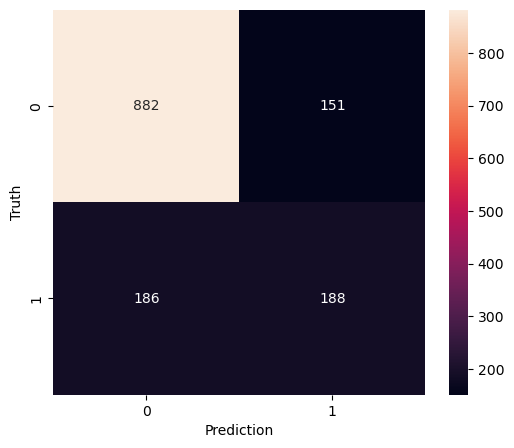

In [281]:
import seaborn as sns
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predict)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Prediction")
plt.ylabel("Truth")
plt.show()

In [283]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84      1033
           1       0.55      0.50      0.53       374

    accuracy                           0.76      1407
   macro avg       0.69      0.68      0.68      1407
weighted avg       0.75      0.76      0.76      1407

